In [12]:
%reset -f
from utils import *
from wavhandler import *
import os
import soundfile as sf
import matplotlib.pyplot as plt
from utils import np_hist

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [13]:
dataset = Dataset('thomas')#C. pomonella')#D. suzukii')
dataset.read(setting='psd_dB', nr_data='all')
print(dataset.target_classes)

Read filenames in 0.11 seconds.
Loaded data into matrix in 4.13 seconds.
['Melanogaster', 'Suzukii']


In [14]:
dataset.select_class('Suzukii')
# dataset.get_frequency_peaks()

In [6]:
# sig = dataset.X.values[np.random.randint(0,321),:]
# # sig = butter_bandpass_filter(sig, L_CUTOFF, H_CUTOFF, F_S, B_ORDER)
# plot_wingbeat(data = sig)
# from scipy.signal import find_peaks
# sigt = transform_data(sig)
# peaks, _ = find_peaks(sigt, height=-99)

# # pd.Series(sigt).plot()
# # plt.plot(peaks, sigt[peaks], 'x')
# print("###############")
# pd.Series(sigt).diff().std()

In [15]:
tmp = dataset.X[dataset.X.apply(lambda x: x.diff().std(), axis=1) < 3.]
tmp.shape

(13420, 129)

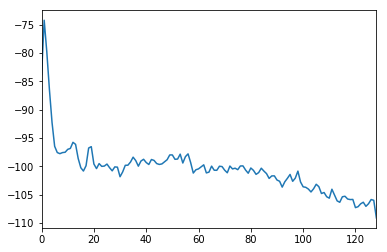

In [16]:
tmp.iloc[np.random.randint(0,100),:].plot()

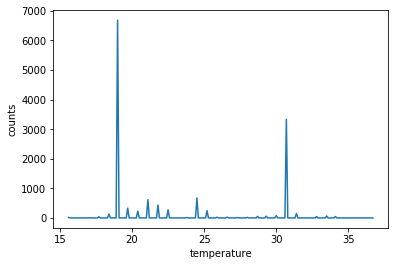

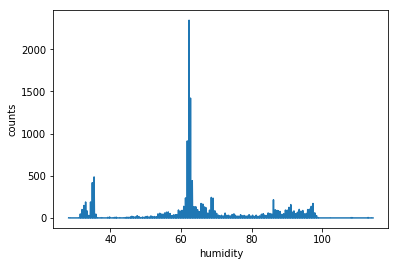

,filenames,wavnames,date,date_day,date_hour,gain,temperature,humidity
6811,/home/kalfasyan/data/insects/thomas/Suzukii/Ma...,F180718_105037_100_G_050_T_25.2_H_62.4,2018-07-18 10:50:37,18,10,050,25.2,62.4
6812,/home/kalfasyan/data/insects/thomas/Suzukii/Ma...,F180718_105038_101_G_050_T_25.2_H_62.4,2018-07-18 10:50:38,18,10,050,25.2,62.4
6813,/home/kalfasyan/data/insects/thomas/Suzukii/Ma...,F180821_134202_189_G_050_T_21.1_H_87.7,2018-08-21 13:42:02,21,13,050,21.1,87.7
6814,/home/kalfasyan/data/insects/thomas/Suzukii/Ma...,F180821_135209_224_G_050_T_21.1_H_86.8,2018-08-21 13:52:09,21,13,050,21.1,86.8
6815,/home/kalfasyan/data/insects/thomas/Suzukii/Ma...,F180821_134220_201_G_050_T_21.1_H_84.8,2018-08-21 13:42:20,21,13,050,21.1,84.8
6816,/home/kalfasyan/data/insects/thomas/Suzukii/Ma...,F180821_133735_185_G_050_T_21.1_H_89.7,2018-08-21 13:37:35,21,13,050,21.1,89.7
6817,/home/kalfasyan/data/insects/thomas/Suzukii/Ma...,F180821_131217_165_G_050_T_21.1_H_91.7,2018-08-21 13:12:17,21,13,050,21.1,91.7
6818,/home/kalfasyan/data/insects/thomas/Suzukii/Ma...,F180821_135016_222_G_050_T_21.1_H_87.3,2018-08-21 13:50:16,21,13,050,21.1,87.3
6819,/home/kalfasyan/data/insects/thomas/Suzukii/Ma...,F180821_133044_175_G_050_T_21.1_H_89.7,2018-08-21 13:30:44,21,13,050,21.1,89.7
6820,/home/kalfasyan/data/insects/thomas/Suzukii/Ma...,F180821_134204_192_G_050_T_21.1_H_87.3,2018-08-21 13:42:04,21,13,050,21.1,87.3


In [10]:
dataset.get_sensor_features(temp_humd=True, hist_temp=True, hist_humd=True)

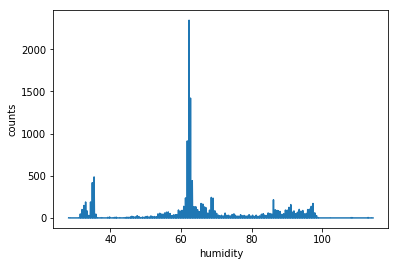

In [34]:
np_hist(df_feats, 'humidity')

In [ ]:
np_hist(df_feats, 'temperature')